In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to
import matplotlib.pyplot as plt
import seaborn as sns
import time

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sample_submission.csv
/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/labels.csv.zip
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/labels.csv
/kaggle/input/description.md
/kaggle/input/GCP-Coupons-Instructions.rtf
/kaggle/input/sample_submission.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv.zip
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/labels.csv
/kaggle/input/new-york-city-taxi-fare-prediction/description.md
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv.zip


In [3]:
train_df =  pd.read_csv('../input/train.csv', nrows = 10_000_000)
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train_df.shape


(10000000, 8)

In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 610.4+ MB


In [6]:
test_data=pd.read_csv('../input/test.csv')
test_data.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2


In [7]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [8]:
train_df.isna().sum()


key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64

In [9]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)
add_travel_vector_features(test_data)


In [10]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))


Old size: 10000000
New size: 9999931


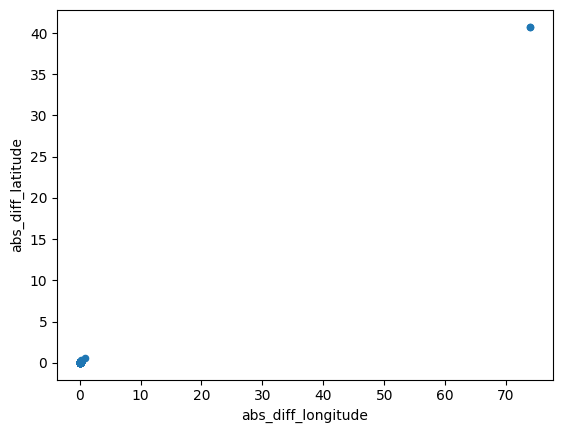

In [11]:
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')


In [12]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude  5.0) & (train_df.abs_diff_latitude  5.0)]
print('New size: %d' % len(train_df))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2784454218.py, line 2)

In [13]:
ls1=list(train_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
train_df['pickuptime']=ls1    



ls1=list(test_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
test_data['pickuptime']=ls1   


In [14]:
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51


In [15]:
test_data.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,21:26
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,01:38
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,19:13
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,02:57
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,22:56


In [16]:
ls1=list(train_df['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i])
    ls1[i]=ls1[i].weekday()
train_df['Weekday']=ls1


ls1=list(test_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i])
    ls1[i]=ls1[i].weekday()
test_data['Weekday']=ls1


In [17]:
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51,1


In [18]:
test_data.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Weekday
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,21:26,4
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,01:38,6
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,19:13,4
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,02:57,2
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,22:56,4


In [19]:
train_df.drop('pickup_datetime',inplace=True,axis=1)
test_data.drop('pickup_datetime',inplace=True,axis=1)


In [20]:
train_df['Weekday'].replace(to_replace=[i for i in range(0,7)],
                            value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)
test_data['Weekday'].replace(to_replace=[i for i in range(0,7)],
                              value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)


/tmp/ipykernel_8/2248404946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weekday'].replace(to_replace=[i for i in range(0,7)],
/tmp/ipykernel_8/2248404946.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [21]:
train_one_hot=pd.get_dummies(train_df['Weekday'])
test_one_hot=pd.get_dummies(test_data['Weekday'])
train_df=pd.concat([train_df,train_one_hot],axis=1)
test_data=pd.concat([test_data,test_one_hot],axis=1)


In [22]:
train_df.drop('Weekday',axis=1,inplace=True)
test_data.drop('Weekday',axis=1,inplace=True)


In [23]:
ls1=list(train_df['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
train_df['pickuptime']=ls1


ls1=list(test_data['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
test_data['pickuptime']=ls1


In [24]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726,False,True,False,False,False,False,False
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652,False,False,False,False,False,True,False
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35,False,False,False,False,True,False,False
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430,False,False,True,False,False,False,False
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751,False,False,False,False,False,True,False


In [25]:
R = 6373.0
lat1 =np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1=[] 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c

    
train_df['Distance']=np.asarray(distance)*0.621



lat1 =np.asarray(np.radians(test_data['pickup_latitude']))
lon1 = np.asarray(np.radians(test_data['pickup_longitude']))
lat2 = np.asarray(np.radians(test_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_data['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
 
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
test_data['Distance']=np.asarray(distance)*0.621


In [26]:
test_data.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Distance
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,2126,True,False,False,False,False,False,False,1.058553
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,138,False,False,False,True,False,False,False,7.498840
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,1913,True,False,False,False,False,False,False,0.517137
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,257,False,False,False,False,False,False,True,9.550439
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,2256,True,False,False,False,False,False,False,8.513993


In [27]:
R = 6373.0
lat1 =np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

lat3=np.zeros(len(train_df))+np.radians(40.6413111)
lon3=np.zeros(len(train_df))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
train_df['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
train_df['Dropoff_Distance_airport']=np.asarray(distance2)*0.621



lat1 =np.asarray(np.radians(test_data['pickup_latitude']))
lon1 = np.asarray(np.radians(test_data['pickup_longitude']))
lat2 = np.asarray(np.radians(test_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_data['dropoff_longitude']))

lat3=np.zeros(len(test_data))+np.radians(40.6413111)
lon3=np.zeros(len(test_data))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
test_data['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
test_data['Dropoff_Distance_airport']=np.asarray(distance2)*0.621


In [28]:
test_data.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Distance,Pickup_Distance_airport,Dropoff_Distance_airport
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,2126,True,False,False,False,False,False,False,1.058553,13.590123,13.558393
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,138,False,False,False,True,False,False,False,7.498840,11.839069,6.455789
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,1913,True,False,False,False,False,False,False,0.517137,14.608822,14.486878
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,257,False,False,False,False,False,False,True,9.550439,13.049703,16.645691
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,2256,True,False,False,False,False,False,False,8.513993,12.859655,16.969689


In [29]:
train_df['Distance']=np.round(train_df['Distance'],2)
train_df['Pickup_Distance_airport']=np.round(train_df['Pickup_Distance_airport'],2)
train_df['Dropoff_Distance_airport']=np.round(train_df['Dropoff_Distance_airport'],2)
test_data['Distance']=np.round(test_data['Distance'],2)
test_data['Pickup_Distance_airport']=np.round(test_data['Pickup_Distance_airport'],2)
test_data['Dropoff_Distance_airport']=np.round(test_data['Dropoff_Distance_airport'],2)


In [30]:
train_df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)
test_data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)


In [31]:
train_df['abs_diff_longitude']=np.abs(train_df['abs_diff_longitude']-np.mean(train_df['abs_diff_longitude']))
train_df['abs_diff_longitude']=train_df['abs_diff_longitude']/np.var(train_df['abs_diff_longitude'])


In [32]:
test_data['abs_diff_longitude']=np.abs(test_data['abs_diff_longitude']-np.mean(test_data['abs_diff_longitude']))
test_data['abs_diff_longitude']=test_data['abs_diff_longitude']/np.var(test_data['abs_diff_longitude'])


In [33]:
train_df.shape


(9999931, 16)

In [34]:
test_data.shape


(9914, 15)

In [35]:
from sklearn.model_selection import train_test_split
X=train_df.drop(['key','fare_amount'],axis=1)
y=train_df['fare_amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=80)


In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))


TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [37]:
pred=np.round(lr.predict(test_data.drop('key',axis=1)),2)


NameError: name 'lr' is not defined

In [38]:
pd.read_csv('/kaggle/input/sample_submission.csv').head()


,key,fare_amount
0,2010-10-01 21:26:11.0000001,11.35
1,2013-10-06 01:38:00.00000083,11.35
2,2012-03-30 19:13:53.0000001,11.35
3,2012-02-08 02:57:23.0000001,11.35
4,2013-12-13 22:56:00.000000237,11.35


In [39]:
Submission=pd.DataFrame(data=pred,columns=['fare_amount'])
Submission['key']=test_data['key']
Submission=Submission[['key','fare_amount']]


NameError: name 'pred' is not defined

In [40]:
Submission.set_index('key',inplace=True)


NameError: name 'Submission' is not defined

In [41]:
Submission.to_csv('Submission.csv')


NameError: name 'Submission' is not defined